<center>
<h2 class="title"><b>Automating Enterprise GIS Administration using Python<b/> </h2>



<h3>Andrew Chapkowski</h3>
<h3>Bill Major</h3>

<div>
    <img src="staticimg/esri-logo.png" alt="logo" 
style="width:20%;height:20%;">
</div>


<h3>Esri User Conference, July 2017</h3>
</center>

<center>
<h3 class="title"><b>Presentation Overview<b/> </h3>
</center>
* Portal Management
  - Create Users
  - Custom Roles
  - Import Root Certificate
  - Portal Logs

* Server Management
  - Accessing Servers
  - Manage Services
  - Query Logs
  - Usage

* Questions

<center><h2>ArcGIS API for Python</h2></center>
- Python API to your Web GIS
- Powerful, modern and easy to use
- Implemented using REST and local capabilities 


<center><h2> What is the Python API for ArcGIS </h2></center>

The ArcGIS API for Python lets ArcGIS Online and ArcGIS Enterprise users, analysts, developers and administrators script and automate tasks ranging from performing big data analysis to content management and administration of their web GIS.
<img src="staticimg/PythonAPIGettingStarted.png" />

<center> <h2> Who Uses the ArcGIS API for Python </h2> </center>

<img src="staticimg/WhatIsArcGISPython.PNG"/>

<center> <h2> Connecting to your GIS</h2></center>

- the GIS is either ArcGIS Online or an ArcGIS Portal
- supports **all** authentication methods

<h4> Accessing your GIS </h4>

In [ ]:
gis_site = GIS(url="https://idt.esri.com/portal", 
          username="portaladmin")

In [4]:
from arcgis.gis import GIS
gis = GIS(url="https://agsapipor1.esri.com/portal", 
          username="admin",
          verify_cert=False)

Enter password: ········


<center>
<h2><b>Portal Administration </b> </h2>


<img src="https://server.arcgis.com/en/data-store/10.4/install/windows/GUID-D6450E2F-31B2-42D4-8EBA-F1B0E3D5EEE4-web.png" align="center" /></center>

In [5]:
#esri.agp
pw = "test1234!"

In [6]:
from arcgis.gis import GIS
gis = GIS(url="https://idt.esri.com/portal", 
          username="portaladmin")

Enter password: ········


<center>
<h2 class="title"><b>Creating a User<b/> </h2>
</center>


In [7]:
user = gis.users.create(level=2,
                        firstname="Demo",
                        lastname="Account2a",
                        username="demoaccount2a",
                        email="fake@esri.com",
                        password=pw)
user

<User username:demoaccount2a>

In [8]:
user.delete()

True

<center>
<h2 class="title"><b>Working with Roles<b/> </h2>
</center>

In [9]:
users = gis.users.search()
systemusers = ['system_publisher', 'esri_nav', 
               'esri_livingatlas', 'esri_boundaries', 
               'esri_demographics']
for user in users:
    if user.username not in systemusers:
        portaluser = gis.users.get(user.username)
        print(portaluser.username, portaluser.role, portaluser.level)

bmajor org_publisher 2
bmajor_uc org_user 1
bmajor_uc1 org_user 1
normaluser org_user 2
olearydw_idt org_admin 2
portaladmin org_admin 2


<center>
<h3 class="title"><b>Creating a Custom Role<b/> </h3>
</center>

In [10]:
roles = gis.users.roles
print(roles.all())

[<Role name: Viewer, description: Viewer>, <Role name: ucdemo2, description: UC Demo Role 2>]


In [11]:
privs = ['portal:publisher:publishFeatures','portal:user:createGroup','portal:user:viewOrgGroups', 'portal:user:createItem', 
         'portal:user:viewOrgItems', 'portal:user:shareGroupToOrg', 'portal:user:shareToPublic', 'portal:user:shareToOrg', 
         'portal:user:shareToGroup', 'portal:user:joinGroup', 'features:user:fullEdit', 'features:user:edit']
customrole = roles.create('ucdemo2', 'UC Demo Role 2017', privs)

In [12]:
customrole.role_id

'dPiv26EgFkV59CyL'

In [13]:
bmajor = gis.users.get('bmajor')
print(bmajor.role)
resp = bmajor.update_role(customrole)
print(bmajor.role)

org_publisher
dPiv26EgFkV59CyL


<center>
<h3 class="title"><b>Assign a Custom Role<b/> </h3>
</center>

In [14]:
newbm = gis.users.create(username='bmajor_uc2', password='bmajor_uc123', firstname='Bill', lastname='Major', \
                         email='uc@esri.com', description='Bill Account for UC Level 1', role='org_viewer', level=1)

In [15]:
newbm.update_role(customrole)

True

In [16]:
newbm.delete()
#customrole.delete()

True

<center>
<h2 class="title"><b>Import SSL Certifcate<b/> </h2>
</center>

- Restarts Portal 

In [17]:
security = gis.admin.security

In [20]:
v = security.ssl.import_certificate(alias="portal_cert", 
                                    certificate="data/ESRIEnterpriseRoot.crt")

<center>
<h2 class="title"><b>Portal Logs<b/> </h2>
</center>

In [21]:
import datetime
import os
import pandas as pd
start_time = datetime.datetime.now() - datetime.timedelta(days=20)

In [24]:
logs = gis.admin.logs
res = logs.query(start_time)

In [25]:
df = pd.DataFrame(res['logMessages'])
df[['code', 'message', 'type']].head()

,code,message,type
0,217064,The web server was found to be stopped. Re-sta...,WARNING
1,217060,The database server was found to be stopped. R...,WARNING
2,218015,Started Index Service.,WARNING
3,218014,Starting Index Service.,WARNING
4,218017,Stopped Index Service.,WARNING


<center>
<h2 class="title"><b>Server Administration<b/> </h2>
</center>

In [26]:
from arcgis.gis import GIS
gis = GIS("https://python.playground.esri.com/portal",
         username="ucdemo2017")

Enter password: ········


In [27]:
servers = gis.admin.servers

### Returning Server Lists

In [28]:
single_server = servers.list()[0]

In [29]:
for server in servers.list():
    print(server)

<Server at https://python.playground.esri.com/server>
<Server at https://python-ga.playground.esri.com/server>
<Server at https://python-ra.playground.esri.com/arcgis>


<center>
<h2 class="title"><b>Finding Servers by Role or Function<b/> </h2>
</center>
<br/>
- Provides a way to find all servers of a specific function and/or role.
- Allows for the specific search for server use type

In [30]:
analytics_server = servers.get(role="", function="GeoAnalytics")
print(analytics_server)

[<Server at https://python-ga.playground.esri.com/server>]


In [31]:
hosting_server = servers.get(role="HOSTING_SERVER")[0]
hosting_server

<Server at https://python.playground.esri.com/server>

<center>
<h2 class="title"><b>Server Status<b/> </h2>
</center>
<br/>

- Ensuring a GIS infrastructure is stable and up is a key component of administrators daily tasks.
- Provides a simple way to ensure all registered servers in the GIS are up.

In [32]:
servers.validate()

True

<center>
<h2 class="title"><b>Service Management<b/> </h2>
</center>
<br/>

- Accessed off of server
- Focuses on the administration of services, not use


In [33]:
services = hosting_server.services

#### Listing Services

- Server objects list service based on folders

In [34]:
services.list(folder='System')[:3]

[<Service at https://python.playground.esri.com/server/admin/services/System/CachingControllers.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/CachingTools.GPServer>,
 <Service at https://python.playground.esri.com/server/admin/services/System/CachingToolsEx.GPServer>]

<center>
<h3 class="title"><b>Service Adminstration<b/> </h3>
</center>

In [35]:
service_list = services.list()

In [36]:
service = service_list[0]
service.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

- Stop a service

In [37]:
service.stop()
service.status

{'configuredState': 'STOPPED', 'realTimeState': 'STOPPED'}

- Start a service

In [38]:
service.start()
service.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

<center>
<h3 class="title"><b>Managing Folders<b/> </h3>
</center>

In [39]:
print(services.folders)
print(services.create_folder("THISISNEW"))
print(services.folders)
print(services.delete_folder("THISISNEW"))
print(services.folders)

['Hosted', 'System', 'Utilities', '/']
True
['Hosted', 'System', 'THISISNEW', 'Utilities', '/']
True
['Hosted', 'System', 'Utilities', '/']


#### Checking for Existence

In [40]:
services.exists("System")

True

### Working with Logs

- Trouble shoot problems
- Track issues
- Manage log sizes

In [41]:
import datetime
import pandas as pd
now = datetime.datetime.now()
start_time = now - datetime.timedelta(days=40)

In [42]:
logs = server.logs

### Visualizing Log Messages

In [43]:
#import getpass
#gis = GIS('http://agsapipor1.esri.com/portal',
#           username='admin',
#           password=getpass.getpass(),
#           verify_cert=False)

In [44]:
servers = gis.admin.servers.list()[0]
logs = servers.logs

In [45]:
res = servers.logs.query(start_time=None)['logMessages'] # get all messages
df = pd.DataFrame.from_records(res)
df[['code', 'machine', 'message']].head()

,code,machine,message
0,20010,10.0.0.250,Error executing tool. CreateBuffers Job ID: j2...
1,500000,10.0.0.250,Table not registered [db_60vw8.hsu_a635a.Fire_...
2,500000,10.0.0.250,Accessing URL http://python.playground.esri.co...
3,9000,10.0.0.250,User 'arcgis_python' does have permission to t...
4,9000,10.0.0.250,"Unparseable date: ""NaN"""


### Server Usage

- Helps to manage system resources 
- Find high use servers and services


In [46]:
report = hosting_server.usage.list()[0]
report.properties['reportname']

'Total requests for the last 7 days'

#### Accessing Report Data

In [47]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
start_time = datetime.datetime.now() - datetime.timedelta(days=10)
end_time = datetime.datetime.now() - datetime.timedelta(days=5)

In [48]:
data = report.query()
data_y = data['report']['report-data'][0][0]['data']
data_x = [pd.to_datetime(datetime.datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]
df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 
ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

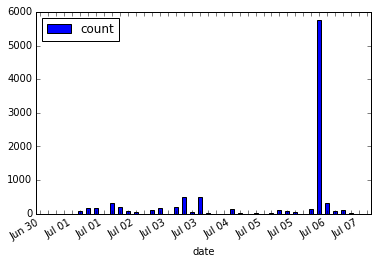

In [49]:
plt.show()

#### Creating Quick Reports

- On the fly reports 
- Supports various time frames: day, week, month, year
- Returns server or folder information

In [57]:
data = hosting_server.usage.quick_report(since="LAST_WEEK", 
                          queries="services/Hosted/", 
                          metrics="RequestAvgResponseTime")

In [58]:
data_y = data['report']['report-data'][0][0]['data']
data_x = [pd.to_datetime(datetime.datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]
df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "Response_Time"])
q = df["Response_Time"].isnull() # change NaN values to 0
df.loc[q, "Response_Time"] = 0
df.index = df['date']
df["Response_Time"] = df["Response_Time"] 

ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

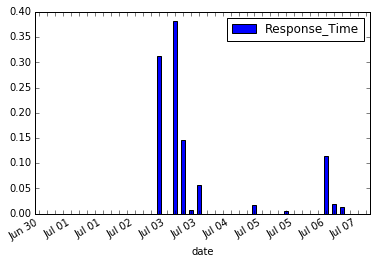

In [59]:
plt.show()

<center> <h2> Where to get it? </h2> </center>

<h3>Install in ArcGIS Pro</h3>

<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_getstarted_InstallAndSetup_03.PNG" />

<center> <h2> Where to get it? </h2> </center>

<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_getstarted_InstallAndSetup_01.PNG"/>

<center> <h2> Try It Live </h2> </center>

**ArcGIS Python Playground**

https://notebooks.esri.com/

# Questions?


<img src="staticimg/SurveySlide.PNG" alt="where"/>

<img src="staticimg/LastSlide.PNG" alt="where"/>